In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [2]:
# load the dataset
data = pd.read_csv('/content/generated_Sneh_dataset.csv')
data.head()

,Fraud,PolicyHolderNumber,VehicleNumber,InsuranceNoteSuspeciousLevel,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,ClaimAmount,CarCompany,...,PolicyHolderIncome,LivingStatus,FuelType,SteeringType,IncidentHourOfDay,witness,ChargedForSpeedingViolation,DrivingExperience,PastAccidents,PoliceReportFilled
0,No,5717,5835,3,Doctor,No,Glass Damage,40-50,1229.68,Honda,...,352314,Married,Petrol,Power,9,4,No,5-10 years,0,No
1,No,9386,8689,4,Teacher,Yes,Accidents,50-60,9298.26,Toyota,...,452377,Single,Electric,Manual,17,0,No,20+ years,1,No
2,No,2408,8321,5,Electrician,No,Vandalism,30-40,2939.69,BMW,...,821368,Single,Electric,Electric,24,3,Yes,5-10 years,2,No
3,No,5153,2334,5,Salesperson,No,Glass Damage,20-30,6783.45,Other,...,566697,Married,Diesel,Power,3,0,No,5-10 years,4,No
4,Yes,7811,2258,4,Doctor,No,Accidents,30-40,6298.16,Audi,...,858536,Single,Electric,Electric,9,2,Yes,5-10 years,4,No


In [3]:
cols_to_drop = ['PolicyHolderNumber','VehicleNumber','CarCompany','CarType','FuelType','SteeringType']

In [4]:
data.drop(columns=cols_to_drop,inplace=True)

In [5]:
data.head()

,Fraud,InsuranceNoteSuspeciousLevel,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,ClaimAmount,Sex,ClaimsFrequency,SafetyRating,PolicyHolderIncome,LivingStatus,IncidentHourOfDay,witness,ChargedForSpeedingViolation,DrivingExperience,PastAccidents,PoliceReportFilled
0,No,3,Doctor,No,Glass Damage,40-50,1229.68,Male,0,2,352314,Married,9,4,No,5-10 years,0,No
1,No,4,Teacher,Yes,Accidents,50-60,9298.26,Female,2,1,452377,Single,17,0,No,20+ years,1,No
2,No,5,Electrician,No,Vandalism,30-40,2939.69,Male,1,0,821368,Single,24,3,Yes,5-10 years,2,No
3,No,5,Salesperson,No,Glass Damage,20-30,6783.45,Female,0,0,566697,Married,3,0,No,5-10 years,4,No
4,Yes,4,Doctor,No,Accidents,30-40,6298.16,Male,2,1,858536,Single,9,2,Yes,5-10 years,4,No


In [6]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X = data[cat_cols].apply(label_encoder.fit_transform)

In [8]:
X

,Fraud,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,Sex,LivingStatus,ChargedForSpeedingViolation,DrivingExperience,PoliceReportFilled
0,0,2,0,6,2,1,0,0,3,0
1,0,13,1,0,3,0,1,0,2,0
2,0,4,0,12,1,1,1,1,3,0
3,0,10,0,6,0,0,0,0,3,0
4,1,2,0,0,1,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
923851,0,5,0,1,3,1,1,1,3,0
923852,0,5,1,8,0,1,0,0,2,0
923853,0,5,0,9,0,1,1,1,3,0
923854,0,6,0,12,3,0,1,1,3,0


In [9]:
X.dtypes

Fraud                            int64
PolicyHolderOccupation           int64
PolicyRecentlyTakenOrUpgraded    int64
ClaimCause                       int64
AgeGroup                         int64
Sex                              int64
LivingStatus                     int64
ChargedForSpeedingViolation      int64
DrivingExperience                int64
PoliceReportFilled               int64
dtype: object

In [10]:
data1=data.drop(["Fraud","PolicyHolderOccupation","PolicyRecentlyTakenOrUpgraded","ClaimCause","AgeGroup","Sex","LivingStatus", "ChargedForSpeedingViolation", "DrivingExperience", "PoliceReportFilled"], axis=1)

In [11]:
fraud=pd.concat([X,data1],axis=1)
fraud

,Fraud,PolicyHolderOccupation,PolicyRecentlyTakenOrUpgraded,ClaimCause,AgeGroup,Sex,LivingStatus,ChargedForSpeedingViolation,DrivingExperience,PoliceReportFilled,InsuranceNoteSuspeciousLevel,ClaimAmount,ClaimsFrequency,SafetyRating,PolicyHolderIncome,IncidentHourOfDay,witness,PastAccidents
0,0,2,0,6,2,1,0,0,3,0,3,1229.68,0,2,352314,9,4,0
1,0,13,1,0,3,0,1,0,2,0,4,9298.26,2,1,452377,17,0,1
2,0,4,0,12,1,1,1,1,3,0,5,2939.69,1,0,821368,24,3,2
3,0,10,0,6,0,0,0,0,3,0,5,6783.45,0,0,566697,3,0,4
4,1,2,0,0,1,1,1,1,3,0,4,6298.16,2,1,858536,9,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923851,0,5,0,1,3,1,1,1,3,0,0,3945.80,0,1,264909,22,2,1
923852,0,5,1,8,0,1,0,0,2,0,3,6436.06,1,1,163404,3,0,1
923853,0,5,0,9,0,1,1,1,3,0,4,1906.04,1,2,422508,16,0,5
923854,0,6,0,12,3,0,1,1,3,0,5,6882.08,1,0,203412,1,2,0


In [12]:
fraud.shape

(923856, 18)

In [13]:
fraud.isnull().sum()

Fraud                            0
PolicyHolderOccupation           0
PolicyRecentlyTakenOrUpgraded    0
ClaimCause                       0
AgeGroup                         0
Sex                              0
LivingStatus                     0
ChargedForSpeedingViolation      0
DrivingExperience                0
PoliceReportFilled               0
InsuranceNoteSuspeciousLevel     0
ClaimAmount                      0
ClaimsFrequency                  0
SafetyRating                     0
PolicyHolderIncome               0
IncidentHourOfDay                0
witness                          0
PastAccidents                    0
dtype: int64

In [14]:
x = fraud.drop(['Fraud'],axis = 1)# independent features
y = fraud['Fraud']# dependent feature

In [15]:
#Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [16]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.06704486 0.00788386 0.05526426 0.04732839 0.01531632 0.01345383
 0.01740882 0.0391544  0.01043156 0.04506876 0.12526497 0.03345047
 0.26323735 0.07902018 0.07161525 0.05512565 0.05393106]


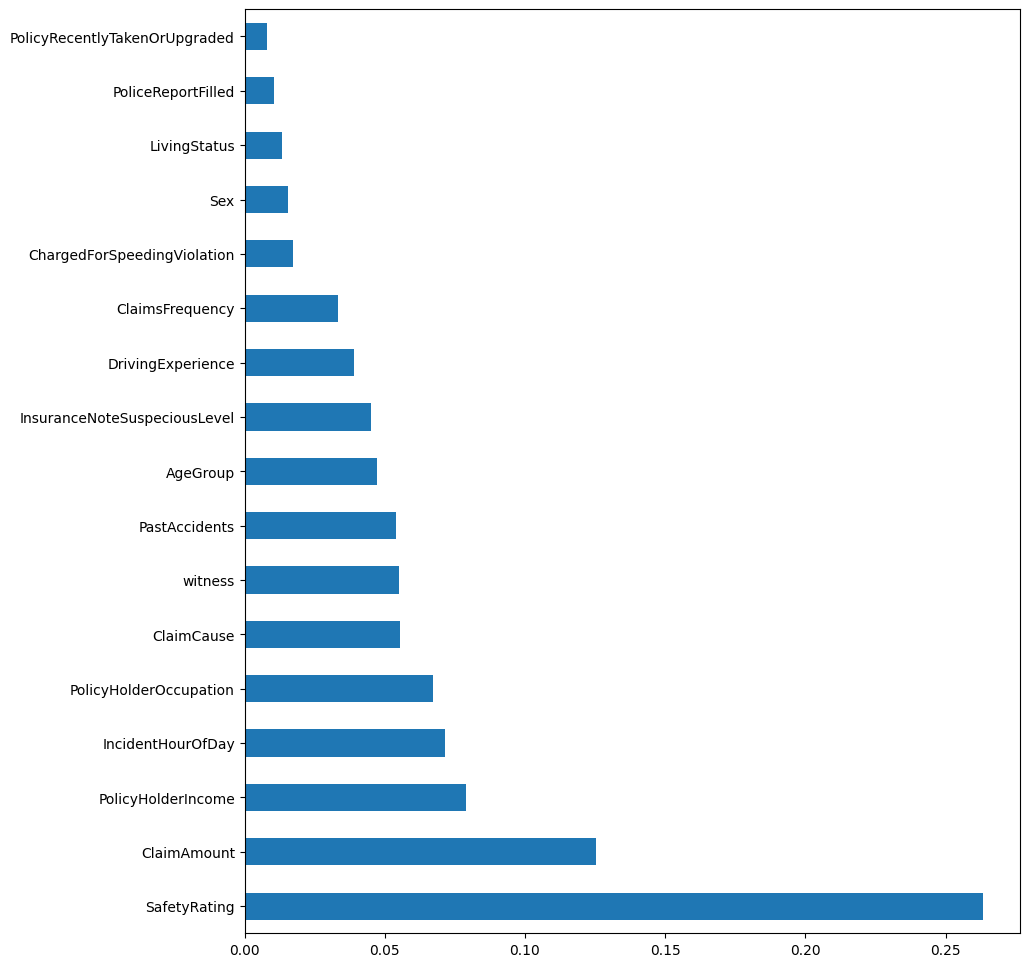

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [19]:
X=x.drop(['LivingStatus', 'Sex'],axis=1)

In [20]:
y.value_counts(normalize=True)

0    0.841042
1    0.158958
Name: Fraud, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=None)

In [22]:
from collections import Counter
Counter(y_train)

Counter({0: 520507, 1: 98476})

In [23]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=50)
print("The number of classes before fit {}".format(Counter(y_train)))
train_df_smote, y_smote = smote.fit_resample(X_train, y_train)

X_train = train_df_smote
y_train = y_smote

y_train_org = np.argmax(y_train, axis=-1)


print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({0: 520507, 1: 98476})
The number of classes after fit Counter({0: 520507, 1: 520507})


In [24]:
print("The number of classes before fit {}".format(Counter(y_test)))
test_df_smote, y_smote = smote.fit_resample(X_test, y_test)

X_test = test_df_smote
y_test = y_smote

y_test_org = np.argmax(y_test, axis=-1)


print("The number of classes after fit {}".format(Counter(y_test)))

The number of classes before fit Counter({0: 256495, 1: 48378})
The number of classes after fit Counter({0: 256495, 1: 256495})


In [25]:
result_df = {
    "model":[],
    "training_score" :[],
    "testing_score": []
}

def modify_result(model, trainSc, testSc):
    result_df["model"].append(model)
    result_df["training_score"].append(trainSc)
    result_df["testing_score"].append(testSc)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,max_features=8,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_features=8, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=20, n_jobs=-1)

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Random forest classifier",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.978329348277218
Testing Score:0.9074229416786905


In [29]:
y_pred=classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[482761  37746]
 [ 54338 466169]]
0.9115439369691474
              precision    recall  f1-score   support

           0       0.90      0.93      0.91    520507
           1       0.93      0.90      0.91    520507

    accuracy                           0.91   1041014
   macro avg       0.91      0.91      0.91   1041014
weighted avg       0.91      0.91      0.91   1041014



In [30]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[221440  35055]
 [ 52612 203883]]
0.8291058305230121
              precision    recall  f1-score   support

           0       0.81      0.86      0.83    256495
           1       0.85      0.79      0.82    256495

    accuracy                           0.83    512990
   macro avg       0.83      0.83      0.83    512990
weighted avg       0.83      0.83      0.83    512990



In [31]:
# import xgboost
# from xgboost import XGBClassifier
# clf =XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=0, missing=None, n_estimators=30, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=10,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
#               silent=None, subsample=1, verbosity=1)
# clf.fit(X_train, y_train)

In [32]:
# y_pred = clf.predict(X_test)
# ytrain_pred =clf.predict_proba(X_train)
# ytest_pred = clf.predict_proba(X_test)
# print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
# print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
# modify_result("XGBoost",
#              accuracy_score(clf.predict(X_train), y_train),
#              accuracy_score(y_test,y_pred))

In [33]:
# y_pred=clf.predict(X_train)
# print(confusion_matrix(y_train,y_pred))
# print(accuracy_score(y_train,y_pred))
# print(classification_report(y_train,y_pred))

In [34]:
# y_pred=clf.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [35]:
# ## Hyperparameter optimization using RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }

In [36]:
# classifier=xgboost.XGBClassifier()
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,refit=True,cv=10,verbose=3)

In [37]:
# random_search.get_params

In [38]:
# random_search.estimator

In [39]:
# classifier=xgboost.XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=0, missing=None, n_estimators=30, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=10,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
#               silent=None, subsample=1, verbosity=1)
# classifier.fit(X_train,y_train)

In [40]:
# y_pred=classifier.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [41]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
clf_gr = GradientBoostingClassifier(n_estimators= 20,learning_rate =0.01, max_depth = 3, random_state = 0)
clf_gr.fit(X_train, y_train)

pred_gr = clf_gr.predict(X_test)

print('(learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_gr.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {}'
     .format(clf_gr.score(X_test, y_test)))
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_gr)))

print('y_test and pred: {}'.format(y_test[:20]))
print('pred: {}'.format(pred_gr))
from sklearn.metrics import classification_report
reportLReg_gf = classification_report(y_test, pred_gr, output_dict=True)
crLReg_gf = pd.DataFrame(reportLReg_gf).transpose()
crLReg_gf

(learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.76
Accuracy of GBDT classifier on test set: 0.7549308953390904
Accuracy score: 0.7549308953390904
y_test and pred: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Fraud, dtype: int64
pred: [1 0 0 ... 0 1 1]


,precision,recall,f1-score,support
0,0.844547,0.624882,0.718295,256495.000000
1,0.702310,0.884980,0.783134,256495.000000
accuracy,0.754931,0.754931,0.754931,0.754931
macro avg,0.773429,0.754931,0.750715,512990.000000
weighted avg,0.773429,0.754931,0.750715,512990.000000


In [42]:
y_pred = clf_gr.predict(X_test)
ytrain_pred =clf_gr.predict_proba(X_train)
ytest_pred = clf_gr.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Gradient Boosting",
             accuracy_score(clf_gr.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.855328139561129
Testing Score:0.8553363220483057


In [43]:
y_pred=clf_gr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[160279  96216]
 [ 29502 226993]]
0.7549308953390904
              precision    recall  f1-score   support

           0       0.84      0.62      0.72    256495
           1       0.70      0.88      0.78    256495

    accuracy                           0.75    512990
   macro avg       0.77      0.75      0.75    512990
weighted avg       0.77      0.75      0.75    512990



In [44]:
# from imblearn.ensemble import EasyEnsembleClassifier
# easy=EasyEnsembleClassifier( n_estimators=20, n_jobs=-1,random_state=42)
# easy.fit(X_train,y_train)

In [45]:
# y_pred = easy.predict(X_test)
# ytrain_pred =easy.predict_proba(X_train)
# ytest_pred = easy.predict_proba(X_test)
# print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
# print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
# modify_result("Easy Ensemble Classifier",
#              accuracy_score(easy.predict(X_train), y_train),
#              accuracy_score(y_test,y_pred))

In [46]:
# y_pred=easy.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [47]:
from sklearn.naive_bayes import GaussianNB as GB
classifier= GB()
classifier.fit(X_train,y_train)

GaussianNB()

In [48]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Guassian Naive Bayes",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.7114477670874004
Testing Score:0.7110371237409644


In [49]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[124540 131955]
 [ 27972 228523]]
0.6882453849002904
              precision    recall  f1-score   support

           0       0.82      0.49      0.61    256495
           1       0.63      0.89      0.74    256495

    accuracy                           0.69    512990
   macro avg       0.73      0.69      0.67    512990
weighted avg       0.73      0.69      0.67    512990



In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [51]:
y_pred = model.predict(X_test)
ytrain_pred =model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Adaboost classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.879823112823296
Testing Score:0.8795679110564338


In [52]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[194227  62268]
 [ 41027 215468]]
0.7986412990506637
              precision    recall  f1-score   support

           0       0.83      0.76      0.79    256495
           1       0.78      0.84      0.81    256495

    accuracy                           0.80    512990
   macro avg       0.80      0.80      0.80    512990
weighted avg       0.80      0.80      0.80    512990



In [53]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = clf1.predict(X_test)
ytrain_pred =clf1.predict_proba(X_train)
ytest_pred = clf1.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Logistic Regression",
             accuracy_score(clf1.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.6383201864221072
Testing Score:0.6383678458566993


In [55]:
y_pred = clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[112910 143585]
 [ 61522 194973]]
0.6001734926606757
              precision    recall  f1-score   support

           0       0.65      0.44      0.52    256495
           1       0.58      0.76      0.66    256495

    accuracy                           0.60    512990
   macro avg       0.61      0.60      0.59    512990
weighted avg       0.61      0.60      0.59    512990



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn_classifier.predict(X_test)
ytrain_pred =knn_classifier.predict_proba(X_train)
ytest_pred = knn_classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("KNN",
             accuracy_score(knn_classifier.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.933109297074803
Testing Score:0.6144857051092106


In [58]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[172476  84019]
 [129880 126615]]
0.5830347570128073
              precision    recall  f1-score   support

           0       0.57      0.67      0.62    256495
           1       0.60      0.49      0.54    256495

    accuracy                           0.58    512990
   macro avg       0.59      0.58      0.58    512990
weighted avg       0.59      0.58      0.58    512990



In [59]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = model.predict(X_test)
ytrain_pred = model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Decision Tree Classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 1.0
Testing Score:0.7581531803738865


In [61]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[199387  57108]
 [ 66957 189538]]
0.7581531803738865
              precision    recall  f1-score   support

           0       0.75      0.78      0.76    256495
           1       0.77      0.74      0.75    256495

    accuracy                           0.76    512990
   macro avg       0.76      0.76      0.76    512990
weighted avg       0.76      0.76      0.76    512990



In [62]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# seed = 7
# kfold = KFold(n_splits=10)
# cart = DecisionTreeClassifier()
# num_trees = 100

# model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
# model1.fit(X_train,y_train)

In [63]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# y_pred = model1.predict(X_test)
# ytrain_pred = model1.predict_proba(X_train)
# ytest_pred = model1.predict_proba(X_test)
# print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
# print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
# modify_result("Bagged Decision Tree Classifier",
#              accuracy_score(model1.predict(X_train), y_train),
#              accuracy_score(y_test, y_pred))

In [64]:
# y_pred=model1.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [65]:
# from sklearn import svm

# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# clff = SVC(probability=True)
# clff.fit(X_train,y_train)
# ytrain_pred = clff.predict_proba(X_train)
# print('Training Score: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
# ytest_pred = clff.predict_proba(X_test)
# print('Testing Score: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

# modify_result("SVM",
#              accuracy_score(clff.predict(X_train), y_train),
#              accuracy_score(y_test, y_pred))

In [66]:
# y_pred=clff.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [67]:
data=pd.DataFrame(result_df)
data.sort_values(['testing_score'],ascending=False)

,model,training_score,testing_score
0,Random forest classifier,0.911544,0.829106
3,Adaboost classifier,0.798895,0.798641
6,Decision Tree Classifier,1.000000,0.758153
1,Gradient Boosting,0.755324,0.754931
2,Guassian Naive Bayes,0.687459,0.688245
4,Logistic Regression,0.600408,0.600173
5,KNN,0.841169,0.583035


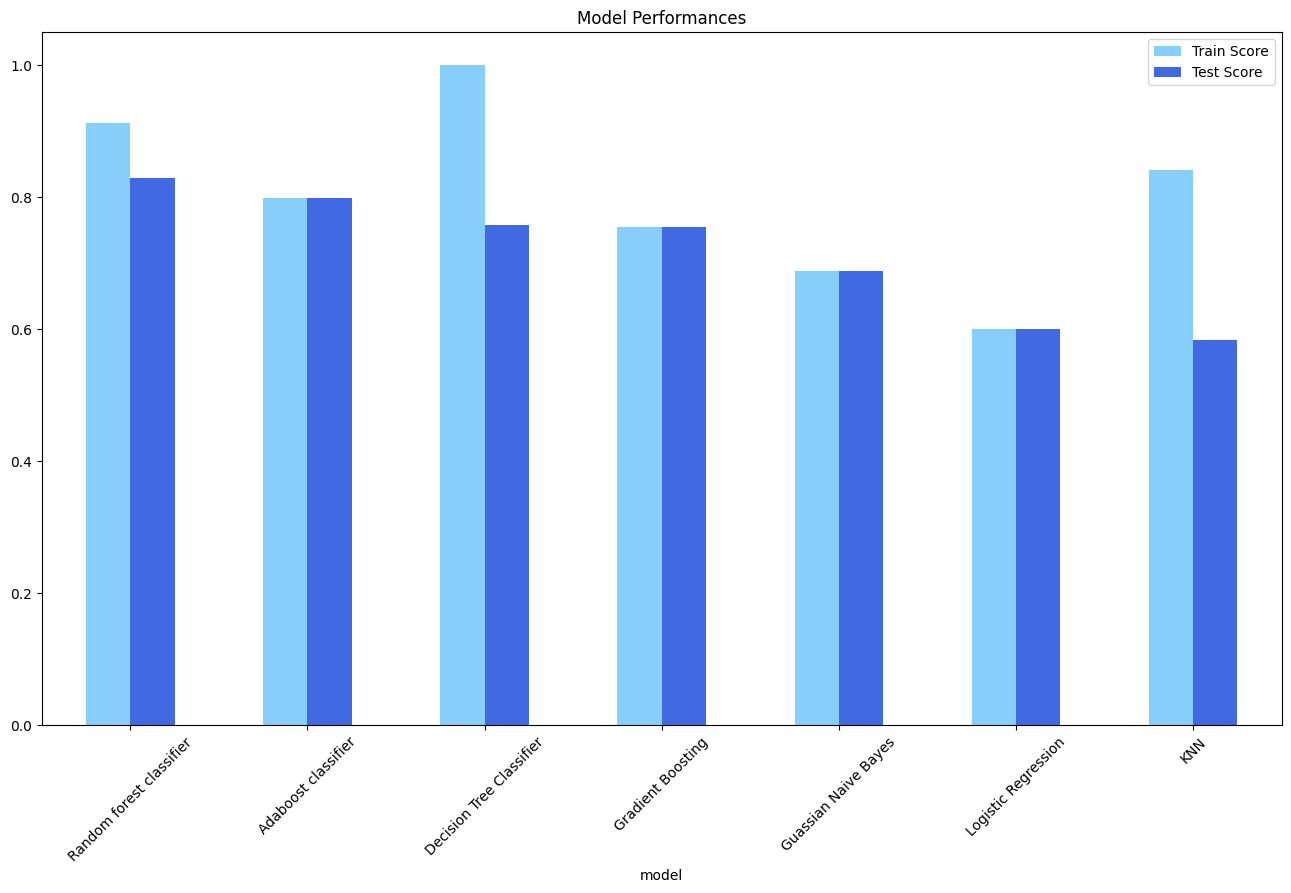

In [68]:
data = pd.DataFrame(result_df)
data.sort_values(by="testing_score", ascending=False).plot(kind="bar", x="model", rot=45, figsize=(16,9),color=["lightskyblue","royalblue"])
plt.title("Model Performances")
plt.ylabel=("Accuracy Score")
plt.xlabel=("Models")
plt.legend(["Train Score","Test Score"])